Copied From https://github.com/NickCellino/reinforcement-learning-exercises

In [1]:
from numpy.random import normal, randn, random_integers, random
import numpy as np

class NArmedBandit(object):

    def __init__(self, n):
        self._arms = randn(n)
    
    def pull_arm(self, arm):
        self.validate_arm(arm)
        return self._arms[arm] + normal()
    
    def num_arms(self):
        return len(self._arms)

    def validate_arm(self, arm):
        if arm < 0 or arm >= self.num_arms():
            raise ValueError("This arm does not exist.")

    def was_optimal_choice(self, arm):
        """
        Tells if the choice was optimal.

        Should be used for analysis purposes only
        (in other words, not for actually solving the problem)
        """
        self.validate_arm(arm)
        return np.argmax(self._arms) == arm

In [2]:
class Agent:

    def __init__(self, num_arms):
        self._num_arms = num_arms
        self._results = np.zeros((self._num_arms, 2))
        self._value_estimates = normal(0, 0.01, size=(self._num_arms))
    
    def reset(self):
        self._value_estimates = normal(size=(self._num_arms))
        self._results = np.zeros((self._num_arms, 2))
            
    def _update_value_estimate(self, reward, arm):
        self._results[arm, 0] += reward
        self._results[arm, 1] += 1
        self._value_estimates[arm] = self._results[arm, 0] / self._results[arm, 1]
            
    def do_pull(self, bandit):
        arm = self._choose_arm()
        reward = bandit.pull_arm(arm)
        self._update_value_estimate(reward, arm)
        return reward, bandit.was_optimal_choice(arm)

class EpsilonGreedyAgent(Agent):

    def __init__(self, epsilon, num_arms):
        Agent.__init__(self, num_arms)
        self._starting_epsilon = epsilon
        self._epsilon = epsilon
    
    def reset(self):
        self._epsilon = self._starting_epsilon
        Agent.reset(self)
    
    def _choose_arm(self):
        if random() < self._epsilon:
            return random_integers(0, len(self._results) - 1)
        else:
            return np.argmax(self._value_estimates)

    def __str__(self):
        return f'Epsilon Greedy Agent (ε={self._epsilon})'

In [3]:
num_tasks = 2000
bandit = NArmedBandit(10)
agent_greedy = EpsilonGreedyAgent(0, 10)
agent_e001 = EpsilonGreedyAgent(0.01, 10)
agent_e01 = EpsilonGreedyAgent(0.1, 10)

In [4]:
num_trials = 2000
agents = [agent_greedy, agent_e001, agent_e01]
rewards = np.zeros((len(agents), num_tasks))

In [5]:
agent_names = ['greedy', 'e001', 'e01']
colors = ['b', 'y', 'r']

In [7]:
for idx in range(num_trials):
    for jdx in range(num_tasks):
        for kdx in range(len(agents)):
            rewards[kdx, jdx] += agents[kdx].do_pull(bandit)[0]

/Users/teliov/Library/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:36: DeprecationWarning: This function is deprecated. Please call randint(0, 9 + 1) instead


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

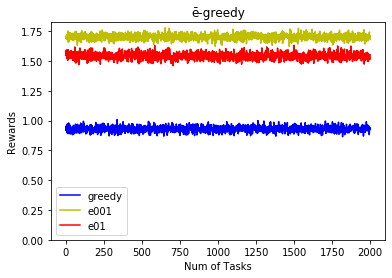

In [10]:
fig, ax = plt.subplots()

for idx in range(len(agents)):
    ax.plot(range(num_tasks), rewards[idx, :]/num_trials, c=colors[idx], label=agent_names[idx])
ax.set_title('ē-greedy')
ax.set_xlabel('Num of Tasks')
ax.set_ylim(ymin=0)
_ =ax.set_ylabel('Rewards')
ax.legend(loc='best')